# GRADED CHALLENGE 4

## I. Introduction

Nama: Nurrahmawati

Batch: FTDS-002

> Objektif:
>- Menganalisis dan memvisualisasikan pengeluaran kartu kredit & data pembayaran 
>- Mengembangkan segmentasi pelanggan untuk menentukan strategi kampanye pemasaran kartu kredit melalui K-Means clustering

Data extraction from ftds-hacktiv8-project 

SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_002_hck.credit-card-information`
WHERE mod(CUST_ID, 2) = 0 

## II. Import Libraries

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

## III. Data Loading

In [2]:
# Load Dataset
data = pd.read_csv('h8dsft_P1G4_Nurrahmawati.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

In [3]:
data.tail()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [4]:
# Checking Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Berdasarkan data informasi ini, kami dapat melihat bahwa ada dua tipe data di sini, yaitu tipe int64 dan float64. Selain itu, terlihat bahwa CREDIT_LIMIT dan MINIMUM_PAYMENTS tidak memiliki baris yang sama dengan kolom lainnya yang mana dari 4475 entri data akan tetapi pada kolom credit_limit hanya 4474 entri data dan kolom minimum_payments terdapat 4317 entri data sehingga kami akan memeriksanya lebih lanjut. 

In [5]:
# Check Percentage Missing Values
data.isnull().mean()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000223
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.035307
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Seperti yang dijelaskan di atas bahwa terdapat missing value pada kolom credit_limit dan minimum_payments yang akan kita handle nantinya pada sesi selanjutnya.

In [6]:
# Checking data duplicated
data[data.duplicated()].shape

(0, 18)

Dapat terlihat bahwa pada dataset yang digunakan tidak terdapat duplikasi data dalam dataset.

In [7]:
for i in data.columns.tolist():
    print(f'num of unique label in {i}: ', len(data[i].unique()))

num of unique label in CUST_ID:  4475
num of unique label in BALANCE:  4439
num of unique label in BALANCE_FREQUENCY:  42
num of unique label in PURCHASES:  3218
num of unique label in ONEOFF_PURCHASES:  2073
num of unique label in INSTALLMENTS_PURCHASES:  2357
num of unique label in CASH_ADVANCE:  2155
num of unique label in PURCHASES_FREQUENCY:  47
num of unique label in ONEOFF_PURCHASES_FREQUENCY:  44
num of unique label in PURCHASES_INSTALLMENTS_FREQUENCY:  47
num of unique label in CASH_ADVANCE_FREQUENCY:  46
num of unique label in CASH_ADVANCE_TRX:  55
num of unique label in PURCHASES_TRX:  147
num of unique label in CREDIT_LIMIT:  154
num of unique label in PAYMENTS:  4350
num of unique label in MINIMUM_PAYMENTS:  4318
num of unique label in PRC_FULL_PAYMENT:  47
num of unique label in TENURE:  7


In [8]:
data.describe().T

count         mean          std  \
CUST_ID                           4475.0  4476.000000  2583.931114   
BALANCE                           4475.0  1565.743939  2091.205727   
BALANCE_FREQUENCY                 4475.0     0.877608     0.235604   
PURCHASES                         4475.0  1003.158324  2210.812899   
ONEOFF_PURCHASES                  4475.0   588.504849  1666.500287   
INSTALLMENTS_PURCHASES            4475.0   415.025075   927.360842   
CASH_ADVANCE                      4475.0   973.453671  2133.464502   
PURCHASES_FREQUENCY               4475.0     0.490122     0.399874   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202614     0.298502   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.364989     0.397336   
CASH_ADVANCE_FREQUENCY            4475.0     0.134156     0.199221   
CASH_ADVANCE_TRX                  4475.0     3.196425     6.500169   
PURCHASES_TRX                     4475.0    14.490503    24.156038   
CREDIT_LIMIT                      4474.0  4494.020175  3668.535689   
PAYMENTS                          4475.0  1726.212274  2961.258570   
MINIMUM_PAYMENTS                  4317.0   854.429538  2306.411178   
PRC_FULL_PAYMENT                  4475.0     0.157206     0.295869   
TENURE                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
CUST_ID                             2.000000  2239.000000  4476.000000   
BALANCE                             0.000000   132.536353   874.905296   
BALANCE_FREQUENCY                   0.000000     0.888889     1.000000   
PURCHASES                           0.000000    40.065000   362.480000   
ONEOFF_PURCHASES                    0.000000     0.000000    29.990000   
INSTALLMENTS_PURCHASES              0.000000     0.000000    89.450000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     1.000000     7.000000   
CREDIT_LIMIT                      150.000000  1500.000000  3000.000000   
PAYMENTS                            0.000000   390.206371   831.048408   
MINIMUM_PAYMENTS                    0.037744   169.814310   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   

                                          75%           max  
CUST_ID                           6713.000000   8950.000000  
BALANCE                           2058.519163  19043.138560  
BALANCE_FREQUENCY                    1.000000      1.000000  
PURCHASES                         1122.640000  49039.570000  
ONEOFF_PURCHASES                   580.320000  40761.250000  
INSTALLMENTS_PURCHASES             484.255000  22500.000000  
CASH_ADVANCE                      1098.569962  29282.109150  
PURCHASES_FREQUENCY                  0.916667      1.000000  
ONEOFF_PURCHASES_FREQUENCY           0.333333      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000      1.000000  
CASH_ADVANCE_FREQUENCY               0.181818      1.166667  
CASH_ADVANCE_TRX                     4.000000    110.000000  
PURCHASES_TRX                       17.000000    358.000000  
CREDIT_LIMIT                      6000.000000  30000.000000  
PAYMENTS                          1895.959003  46930.598240  
MINIMUM_PAYMENTS                   830.395060  61031.618600  
PRC_FULL_PAYMENT                     0.166667      1.000000  
TENURE                              12.000000     12.000000

**Pemahaman tentang dataset pada setiap kolom:**
```txt
- CUST_ID                       : Identifikasi pemegang Kartu Kredit
- SALDO                         : Saldo jumlah yang tersisa di akun mereka untuk melakukan pembelian (US$)
- BALANCE_FREQUENCY             : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering 
                                  diperbarui, 0 = tidak sering diperbarui)
- PURCHASES                     : Jumlah pembelian yang dilakukan dari akun (US$)
- ONEOFF_PURCHASES              : Jumlah pembelian maksimum dilakukan dalam sekali jalan (US$)
- INSTALLMENTS_PURCHASES        : Jumlah pembelian yang dilakukan secara angsuran (US$)
- CASH_ADVANCE                  : Uang muka yang diberikan oleh pengguna (US$)
- PURCHASES_FREQUENCY           : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering 
                                  dibeli, 0 = tidak sering dibeli)
- ONEOFF_PURCHASES_FREQUENCY    : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 
                                  0 = tidak sering dibeli)
- PURCHASES_INSTALLMENTS_FREQUENCY: Seberapa sering pembelian dengan cara mencicil dilakukan (1 = sering 
                                  dilakukan, 0 = tidak sering dilakukan)
- CASH_ADVANCE_FREQUENCY        : Seberapa sering uang muka dibayarkan (range 0 - 1)
- CASH_ADVANCE_TRX              : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- PURCHASES_TRX                 : Jumlah transaksi pembelian yang dilakukan
- CREDIT_LIMIT                  : Batas Kartu Kredit untuk pengguna (US$)
- PAYMENTS                      : Jumlah Pembayaran yang dilakukan oleh pengguna (US$)
- MINIMUM_PAYMENTS              : Jumlah minimum pembayaran yang dilakukan oleh pengguna (US$)
- PRC_FULL_PAYMENT              : Persentase pembayaran penuh yang dibayarkan oleh pengguna (range 0 - 1)
- TENURE                        : Masa berlaku layanan kartu kredit untuk pengguna (6 bulan hingga 12 bulan)
```

Setelah memeriksa lebih lanjut dengan menggunakan deskripsi pada data ini, kami menemukan bahwa terdapat pada kolom dengan yg seharusnya memiliki range 0 - 1 tetapi di data masih dalam angka berbentuk float, sehingga kami akan mengubah tipe data binnary dari float menjadi int

**Berdasarkan gambaran umum:**

1) Tidak ada variabel target yang secara khusus disebutkan dalam objektif

2) Berdasarkan hitungan, mungkin ada nilai yang hilang pada kolom Batas kredit dan pembayaran minimum karena nilainya kurang dari 4475.

3) Kolom CUST_ID dapat dihapus, karena tidak akan mempengaruhi dalam melakukan clustering

4) Mengubah tipe data dari float menjadi int pada kolom `BALANCE_FREQUENCY`, `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`, dan `PRC_FULL_PAYMENT`

5) Jangka waktu penggunaan kartu kredit oleh nasabah antara 6 sampai dengan 12 tahun, namun rata-rata 11,5 tahun. karenanya mungkin ada outlier yang ada dalam kumpulan data. Fluktuasi serupa juga ada di kolom lain.

## IV Data Cleaning

In [9]:
data_clean = data.copy()
data_clean.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

In [10]:
data_clean[data_clean.isnull().any(axis=1)]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
2        2322     1.979916           0.125000      80.00             80.00   
6        4360  2730.843802           1.000000    2900.00           2900.00   
8        5884    18.885677           0.375000      57.00             57.00   
27       1830     0.000000           0.000000      66.75              0.00   
...       ...          ...                ...        ...               ...   
4049     7492  2242.311686           1.000000     437.00             97.00   
4087     4290  1948.434315           1.000000     324.30            324.30   
4091     5468  4618.091584           1.000000     541.68            541.68   
4144     4234    27.716642           0.100000       0.00              0.00   
4293     8058   116.172752           0.111111       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
6                       0.00      0.000000             0.125000   
8                       0.00      0.000000             0.125000   
27                     66.75      0.000000             0.250000   
...                      ...           ...                  ...   
4049                  340.00    184.648692             0.333333   
4087                    0.00   1468.083560             0.166667   
4091                    0.00   3580.753362             0.166667   
4144                    0.00    480.104401             0.000000   
4293                    0.00   1867.994674             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
2                       0.125000                          0.000000   
6                       0.125000                          0.000000   
8                       0.125000                          0.000000   
27                      0.000000                          0.250000   
...                          ...                               ...   
4049                    0.083333                          0.333333   
4087                    0.166667                          0.000000   
4091                    0.166667                          0.000000   
4144                    0.000000                          0.000000   
4293                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
2                   0.000000                 0              1        1500.0   
6                   0.000000                 0              1        2900.0   
8                   0.000000                 0              1        1500.0   
27                  0.000000                 0              3        4000.0   
...                      ...               ...            ...           ...   
4049                0.166667                 2              5        2400.0   
4087                0.166667                 4              4        5000.0   
4091                0.166667                 2              2        8500.0   
4144                0.100000                 1              0        5000.0   
4293                0.111111                 6              0        3000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0          0.0               NaN               0.0       8  
2          0.0               NaN               0.0       8  
6          0.0               NaN               0.0       8  
8          0.0               NaN               0.0       8  
27         0.0               NaN               0.0      12  
...        ...               ...               ...     ...  
4049       0.0               NaN               

Untuk memasukkan fitur MINIMUM_PAYMENTS, kami tidak melihat kolom apa pun yang terkait dengan fitur ini dan membantu kami memperkirakan nilai untuk catatan yang hilang. Tampaknya nilai hilang secara acak dan kita cukup menggunakan median untuk menggantikan nilai Nan karena distribusi minimum payments miring dan karenanya median memberikan estimasi yang lebih baik dari kecenderungan sentral dari fitur ini. Kita lakukan hal yang sama untuk credit limit. 

In [11]:
data_clean['MINIMUM_PAYMENTS'] = data_clean['MINIMUM_PAYMENTS'].fillna(data_clean['MINIMUM_PAYMENTS'].median())
data_clean['CREDIT_LIMIT'] = data_clean['CREDIT_LIMIT'].fillna(data_clean['CREDIT_LIMIT'].median())

data_clean.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# Change type of data
data_clean['BALANCE_FREQUENCY'] = data_clean.BALANCE_FREQUENCY.astype('int64')
data_clean['PURCHASES_FREQUENCY'] = data_clean.PURCHASES_FREQUENCY.astype('int64')
data_clean['ONEOFF_PURCHASES_FREQUENCY'] = data_clean.ONEOFF_PURCHASES_FREQUENCY.astype('int64')
data_clean['PURCHASES_INSTALLMENTS_FREQUENCY'] = data_clean.PURCHASES_INSTALLMENTS_FREQUENCY.astype('int64')
data_clean['CASH_ADVANCE_FREQUENCY'] = data_clean.CASH_ADVANCE_FREQUENCY.astype('int64')
data_clean['PRC_FULL_PAYMENT'] = data_clean.PRC_FULL_PAYMENT.astype('int64')

In [13]:
# dropping customer id
data_clean.drop('CUST_ID',axis=1,inplace=True)
data_clean.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    16.581535                  0      200.0               0.0   
1   943.584041                  0      103.0             103.0   
2     1.979916                  0       80.0              80.0   
3   461.455720                  1      585.0             585.0   
4  1053.594730                  1     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                    0   
1                     0.0           0.0                    0   
2                     0.0           0.0                    0   
3                     0.0           0.0                    0   
4                     0.0           0.0                    0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                           0                                 0   
1                           0                                 0   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0              2        1200.0   
1                       0                 0              1        1000.0   
2                       0                 0              1        1500.0   
3                       0                 0              1        1000.0   
4                       0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000        309.854995                 0       8  
1  215.325023        410.484825                 0       8  
2    0.000000        309.854995                 0       8  
3  258.032630        151.696433                 0       8  
4  397.090516        227.143184                 0       8

## V. EDA for Analysis Purpose

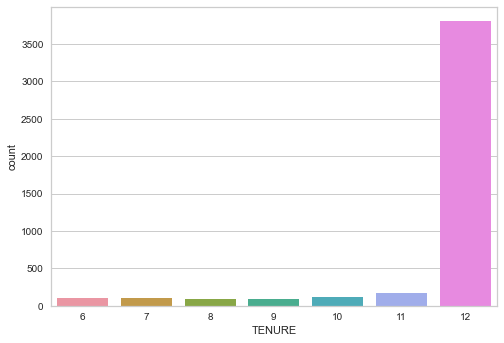

In [14]:
# checking tenure
sns.countplot(x='TENURE',data=data_clean)
plt.show()

Kebanyakan kartu kredit memiliki masa tenor 12 bulan.

In [15]:
fig = px.pie(data_clean, names='CREDIT_LIMIT', height=600, width= 600, color_discrete_sequence=px.colors.sequential.RdBu,  title='Pie Chart for Different Credit Limit Values')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Berdasarkan visualisasi di atas, diketahui bahwa pada pengguna kartu kredit data ini terbanyak yg memiliki credit limit sebesar 1500 dan 3000

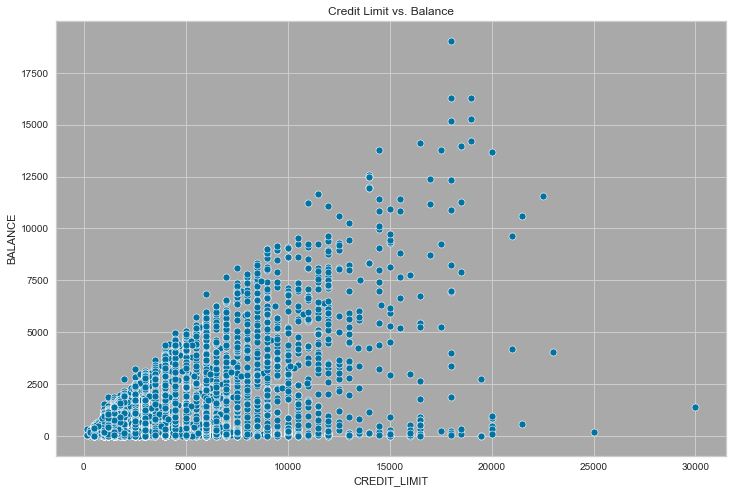

In [16]:
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=data_clean)
g.set_title('Credit Limit vs. Balance')
plt.show()

Kita dapat melihat beberapa korelasi antara batas kredit dan saldo, sehingga mereka yang memiliki batas kredit yang lebih tinggi umumnya membelanjakan lebih banyak.

## VI. Split data into Train and Test

In [17]:
# separating inference data
df_inf = data_clean.sample(10, random_state=32)

# separating inferential data from dataframe
data_clean = data_clean.drop(df_inf.index)
data_clean.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    16.581535                  0      200.0               0.0   
1   943.584041                  0      103.0             103.0   
2     1.979916                  0       80.0              80.0   
3   461.455720                  1      585.0             585.0   
4  1053.594730                  1     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                    0   
1                     0.0           0.0                    0   
2                     0.0           0.0                    0   
3                     0.0           0.0                    0   
4                     0.0           0.0                    0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                           0                                 0   
1                           0                                 0   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0              2        1200.0   
1                       0                 0              1        1000.0   
2                       0                 0              1        1500.0   
3                       0                 0              1        1000.0   
4                       0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000        309.854995                 0       8  
1  215.325023        410.484825                 0       8  
2    0.000000        309.854995                 0       8  
3  258.032630        151.696433                 0       8  
4  397.090516        227.143184                 0       8

Kami akan membagi data kami menjadi proporsi 80% data train dan 20% data tes.

In [18]:
train, test = train_test_split(data_clean, test_size=0.2, random_state=1)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (3572, 17)
Test size:  (893, 17)


In [19]:
train.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2128   363.344239                  0     665.86            234.98   
3199  1935.362486                  1    4915.60           4515.34   
1013  4315.123399                  1    3927.58           2238.34   
830     80.178891                  1    1200.00              0.00   
3376   442.111046                  1     671.36              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2128                  430.88      0.000000                    0   
3199                  400.26    293.844792                    1   
1013                 1689.24      0.000000                    1   
830                  1200.00      0.000000                    1   
3376                  671.36    777.528996                    0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2128                           0                                 0   
3199                           1                                 0   
1013                           0                                 1   
830                            0                                 0   
3376                           0                                 0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2128                       0                 0             34        4000.0   
3199                       0                 1             50        9000.0   
1013                       0                 0             21       11000.0   
830                        0                 0             12        1200.0   
3376                       0                 1             13        3000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2128  1734.889908        232.164739                 0      12  
3199  4921.066897        594.756686                 0      12  
1013  1518.432988       1317.325470                 0      12  
830   1037.627280        165.880254                 1      12  
3376    63.199553        210.928816                 0      12

In [20]:
# get name columns for data type numeric and categoric
num_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
cat_col = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']

print('Numerical Columns   : ', train[num_col].columns.tolist())
print('-'*50)
print('Categorical Columns : ', train[cat_col].columns.tolist())

Numerical Columns   :  ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
--------------------------------------------------
Categorical Columns :  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']


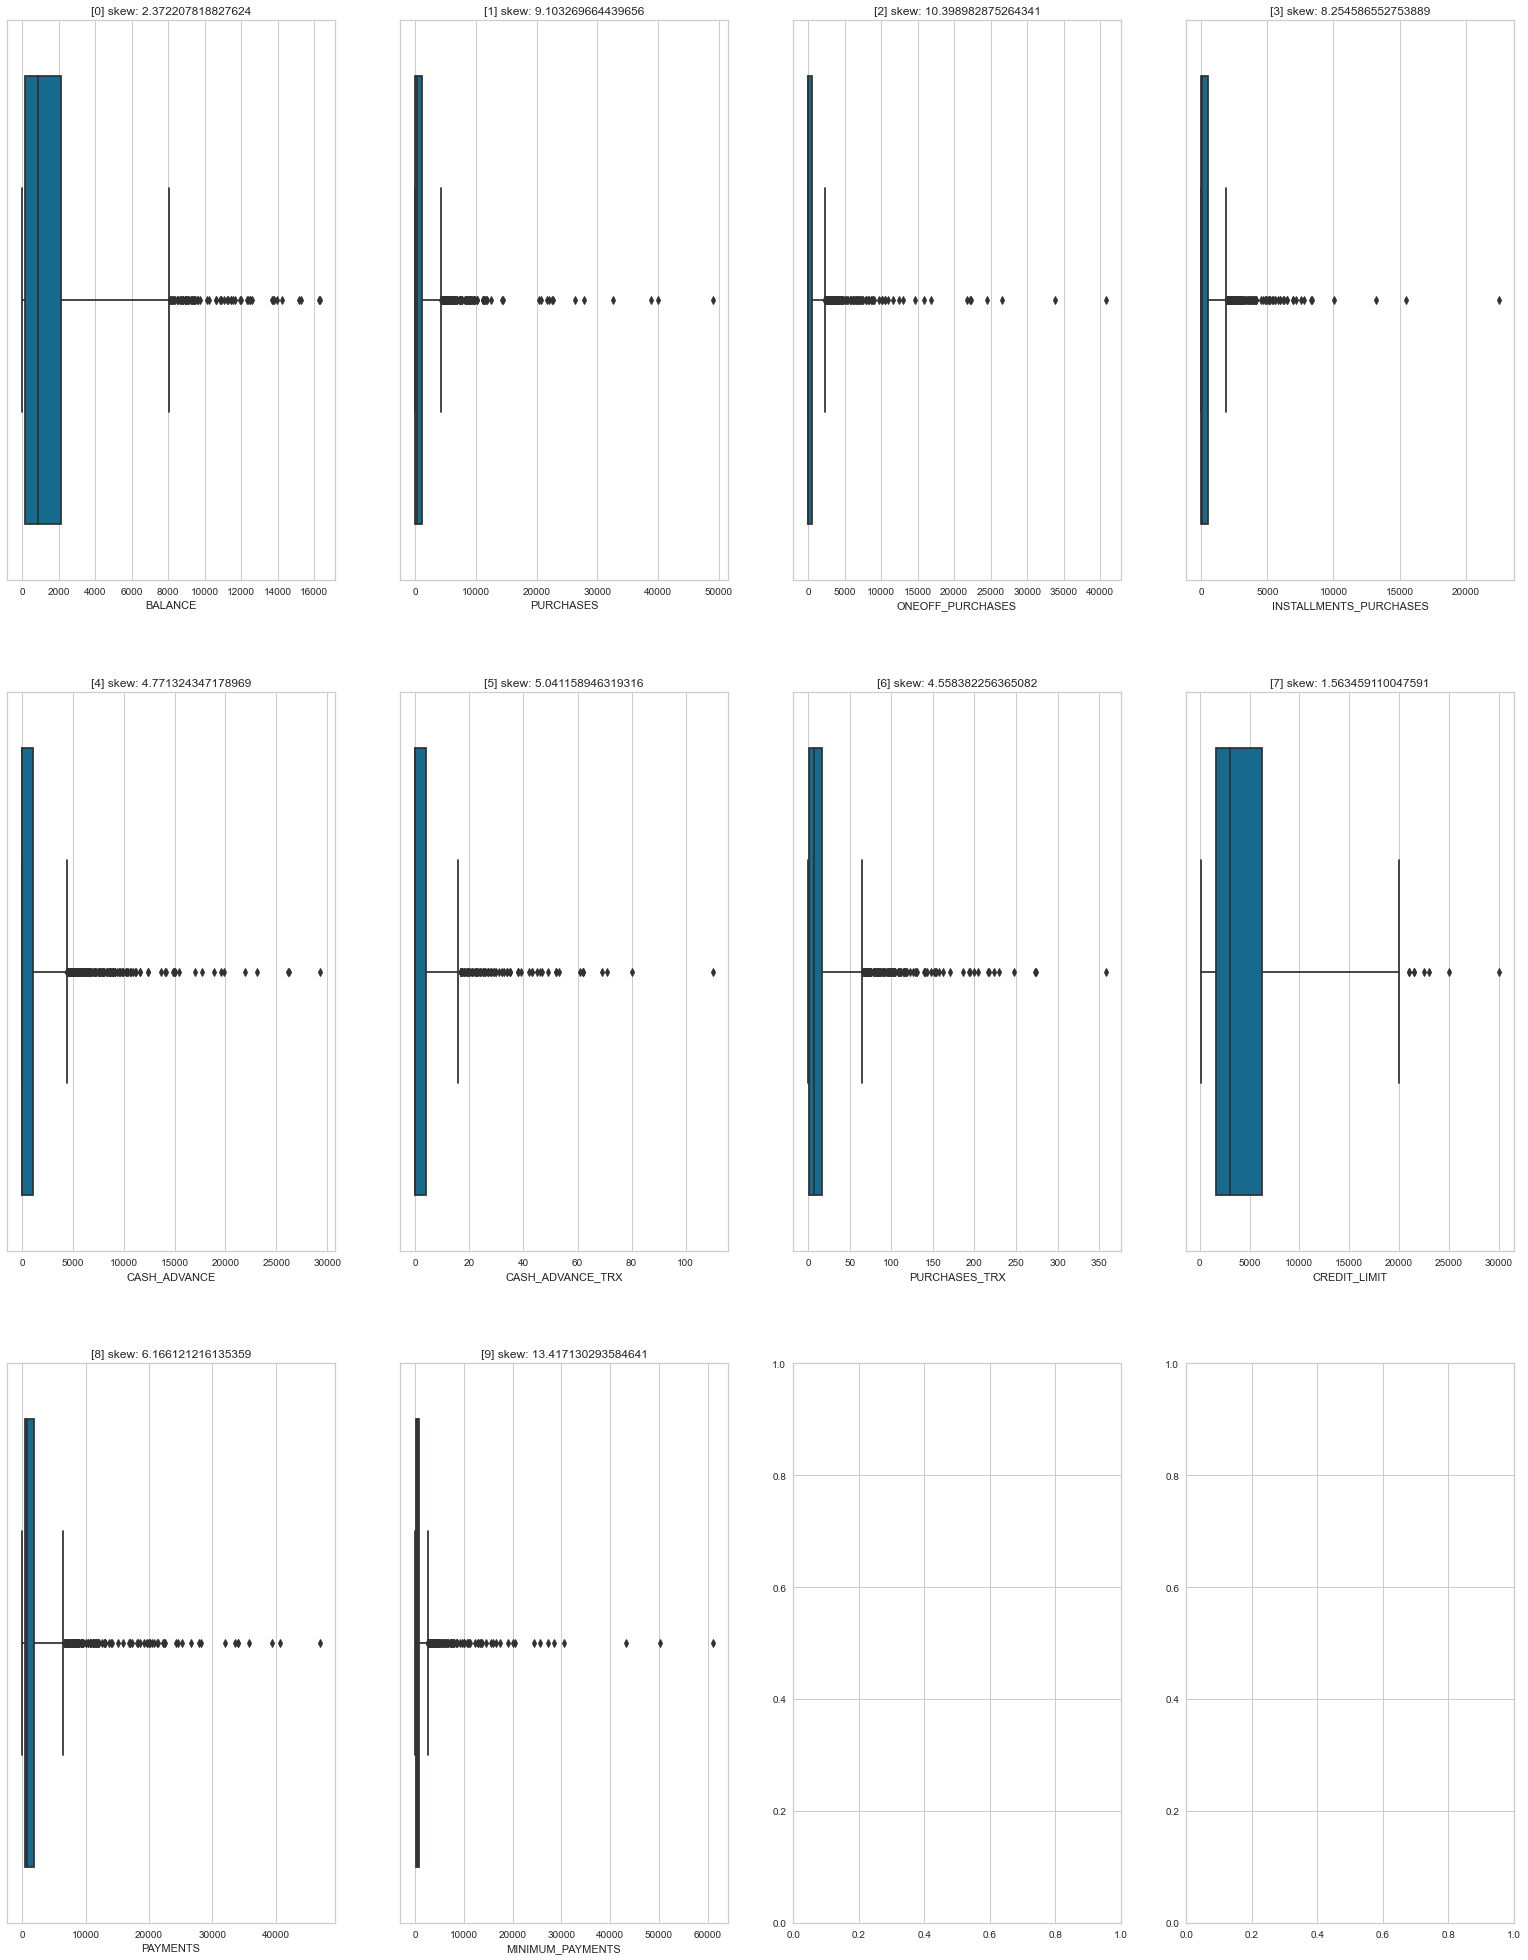

In [21]:
fig, ax = plt.subplots(ncols=4,nrows=3, figsize=[27,35])
ax = ax.flatten()

for idx, col in enumerate(train[num_col].columns):
    sns.boxplot(train[num_col][col], ax=ax[idx], whis=3)
    ax[idx].set_title(f'{[idx]} skew: {train[num_col][col].skew()}')

Hampir semua kolom distribusi data skewed dengan nilai skew yang cukup besar (< -1 dan > 1). 

Untuk masalah pengelompokan, sekarang bergantung pada aplikasi kami apakah kami ingin menangani kecondongan dalam kumpulan data kami. Misalnya, jika kami ingin melakukan pengelompokan untuk deteksi anomali, kami tidak ingin menangani outlier karena kami ingin model kami mendeteksi dan mengelompokkannya dalam sebuah cluster. Kami mencari visualisasi yang bagus untuk aplikasi kami, jadi kami ingin menangani skewness sebanyak mungkin karena ini akan membantu model membentuk cluster yang lebih baik.

In [22]:
def outlier_analysis(train,col):
  skewness = train[col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = train[col].mean() + 3*train[col].std()
    lower = train[col].mean() - 3*train[col].std()
  else:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (3*IQR)
    lower = Q3 - (3*IQR)
  
  # no_outliers = train[(train[col]>=lower) & (train[col]<=upper)]
  outliers = train[(train[col]<lower) | (train[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/train.shape[0] * 100, '%')
  return outliers, upper, lower

for i in list(train[num_col].columns):
  outlier_analysis(train[num_col],i)

percentage outlier from BALANCE : 2.1836506159014557 %
percentage outlier from PURCHASES : 1.4837625979843225 %
percentage outlier from ONEOFF_PURCHASES : 1.371780515117581 %
percentage outlier from INSTALLMENTS_PURCHASES : 1.4557670772676372 %
percentage outlier from CASH_ADVANCE : 2.0996640537514 %
percentage outlier from CASH_ADVANCE_TRX : 1.7917133258678613 %
percentage outlier from PURCHASES_TRX : 2.1836506159014557 %
percentage outlier from CREDIT_LIMIT : 1.6237402015677491 %
percentage outlier from PAYMENTS : 1.6517357222844344 %
percentage outlier from MINIMUM_PAYMENTS : 1.0918253079507279 %


Kami menangani outlier pada train numerik data karena mengingat hal tentang K-mean yang sensitif dengan outlier sehingga perlu penanganan dari outlier pada data ini

In [23]:
wins = Winsorizer(capping_method='iqr',
                                tail='both',
                                fold=3,
                                variables=
                                ['BALANCE', 'PURCHASES',
                                'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                'CASH_ADVANCE', 'CASH_ADVANCE_TRX',
                                'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                                'MINIMUM_PAYMENTS'])
wins.fit(train)
train_clean = wins.transform(train)

Berikut adalah visualisasi setelah outlier ditangani.

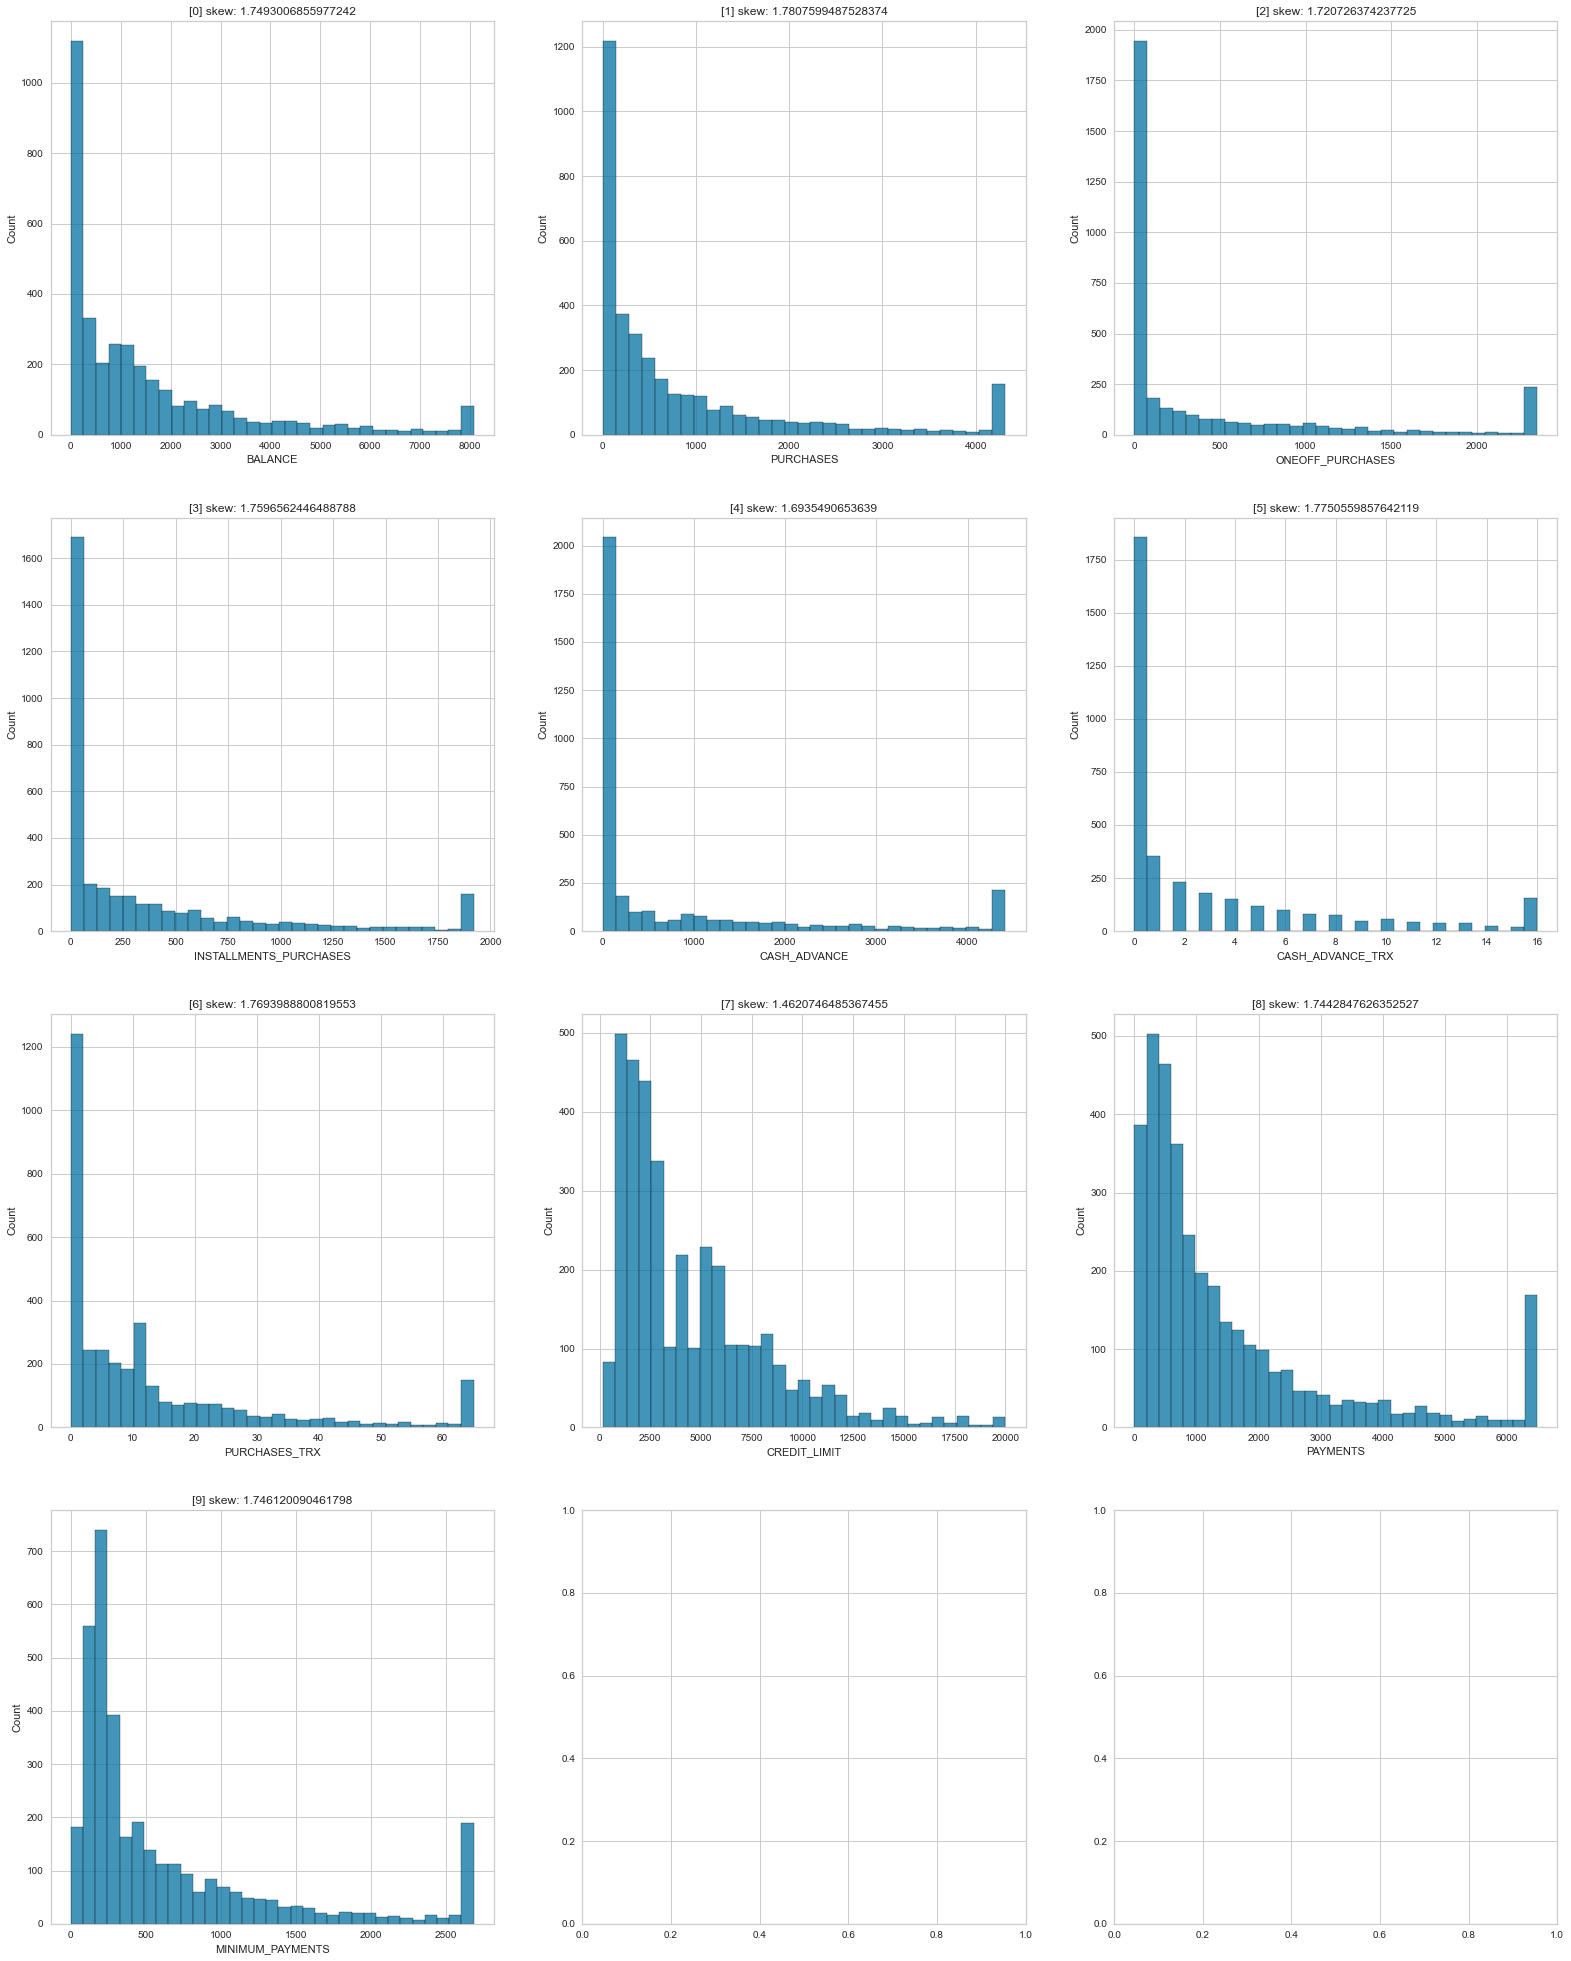

In [24]:
fig, ax = plt.subplots(ncols=3,nrows=4, figsize=[27,35])
ax = ax.flatten()

for idx, col in enumerate(train_clean[num_col].columns):
    sns.histplot(train_clean[col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {train_clean[col].skew()}')

Setelah menangani outlier, langkah selanjutnya adalah menskalakan fitur numerik dalam dataset.

In [25]:
norm = 0
nonorm = 0
for col in train_clean[num_col].columns:
  if train_clean[col].skew() >=-0.5 and train_clean[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [26]:
# scaling the data
scaler=MinMaxScaler()
x=scaler.fit_transform(train_clean[num_col])
train_scaled=pd.DataFrame(x, columns=train_clean[num_col].columns)
train_scaled.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  0.045015   0.154194          0.099884                0.224417   
1  0.239775   1.000000          1.000000                0.208469   
2  0.534607   0.909515          0.951457                0.879812   
3  0.009933   0.277886          0.000000                0.625000   
4  0.054774   0.155468          0.000000                0.349667   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0      0.000000            0.0000       0.523077      0.193955  0.267672   
1      0.066551            0.0625       0.769231      0.445844  0.759258   
2      0.000000            0.0000       0.323077      0.546599  0.234275   
3      0.000000            0.0000       0.184615      0.052897  0.160093   
4      0.176098            0.0625       0.200000      0.143577  0.009751   

   MINIMUM_PAYMENTS  
0          0.086396  
1          0.221351  
2          0.490286  
3          0.061726  
4          0.078492

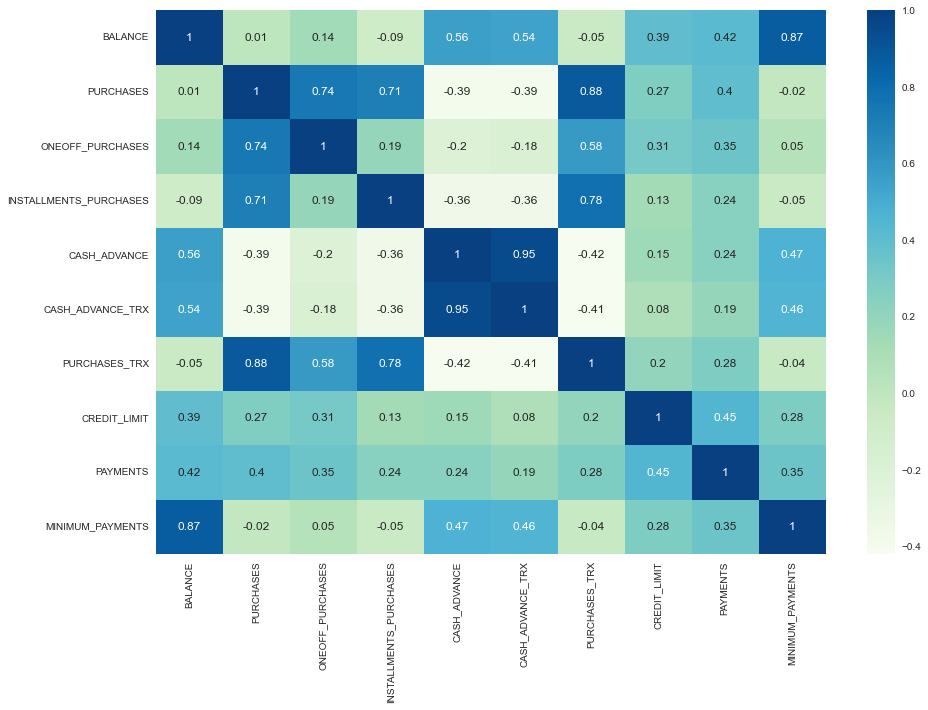

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(round(train_scaled.corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

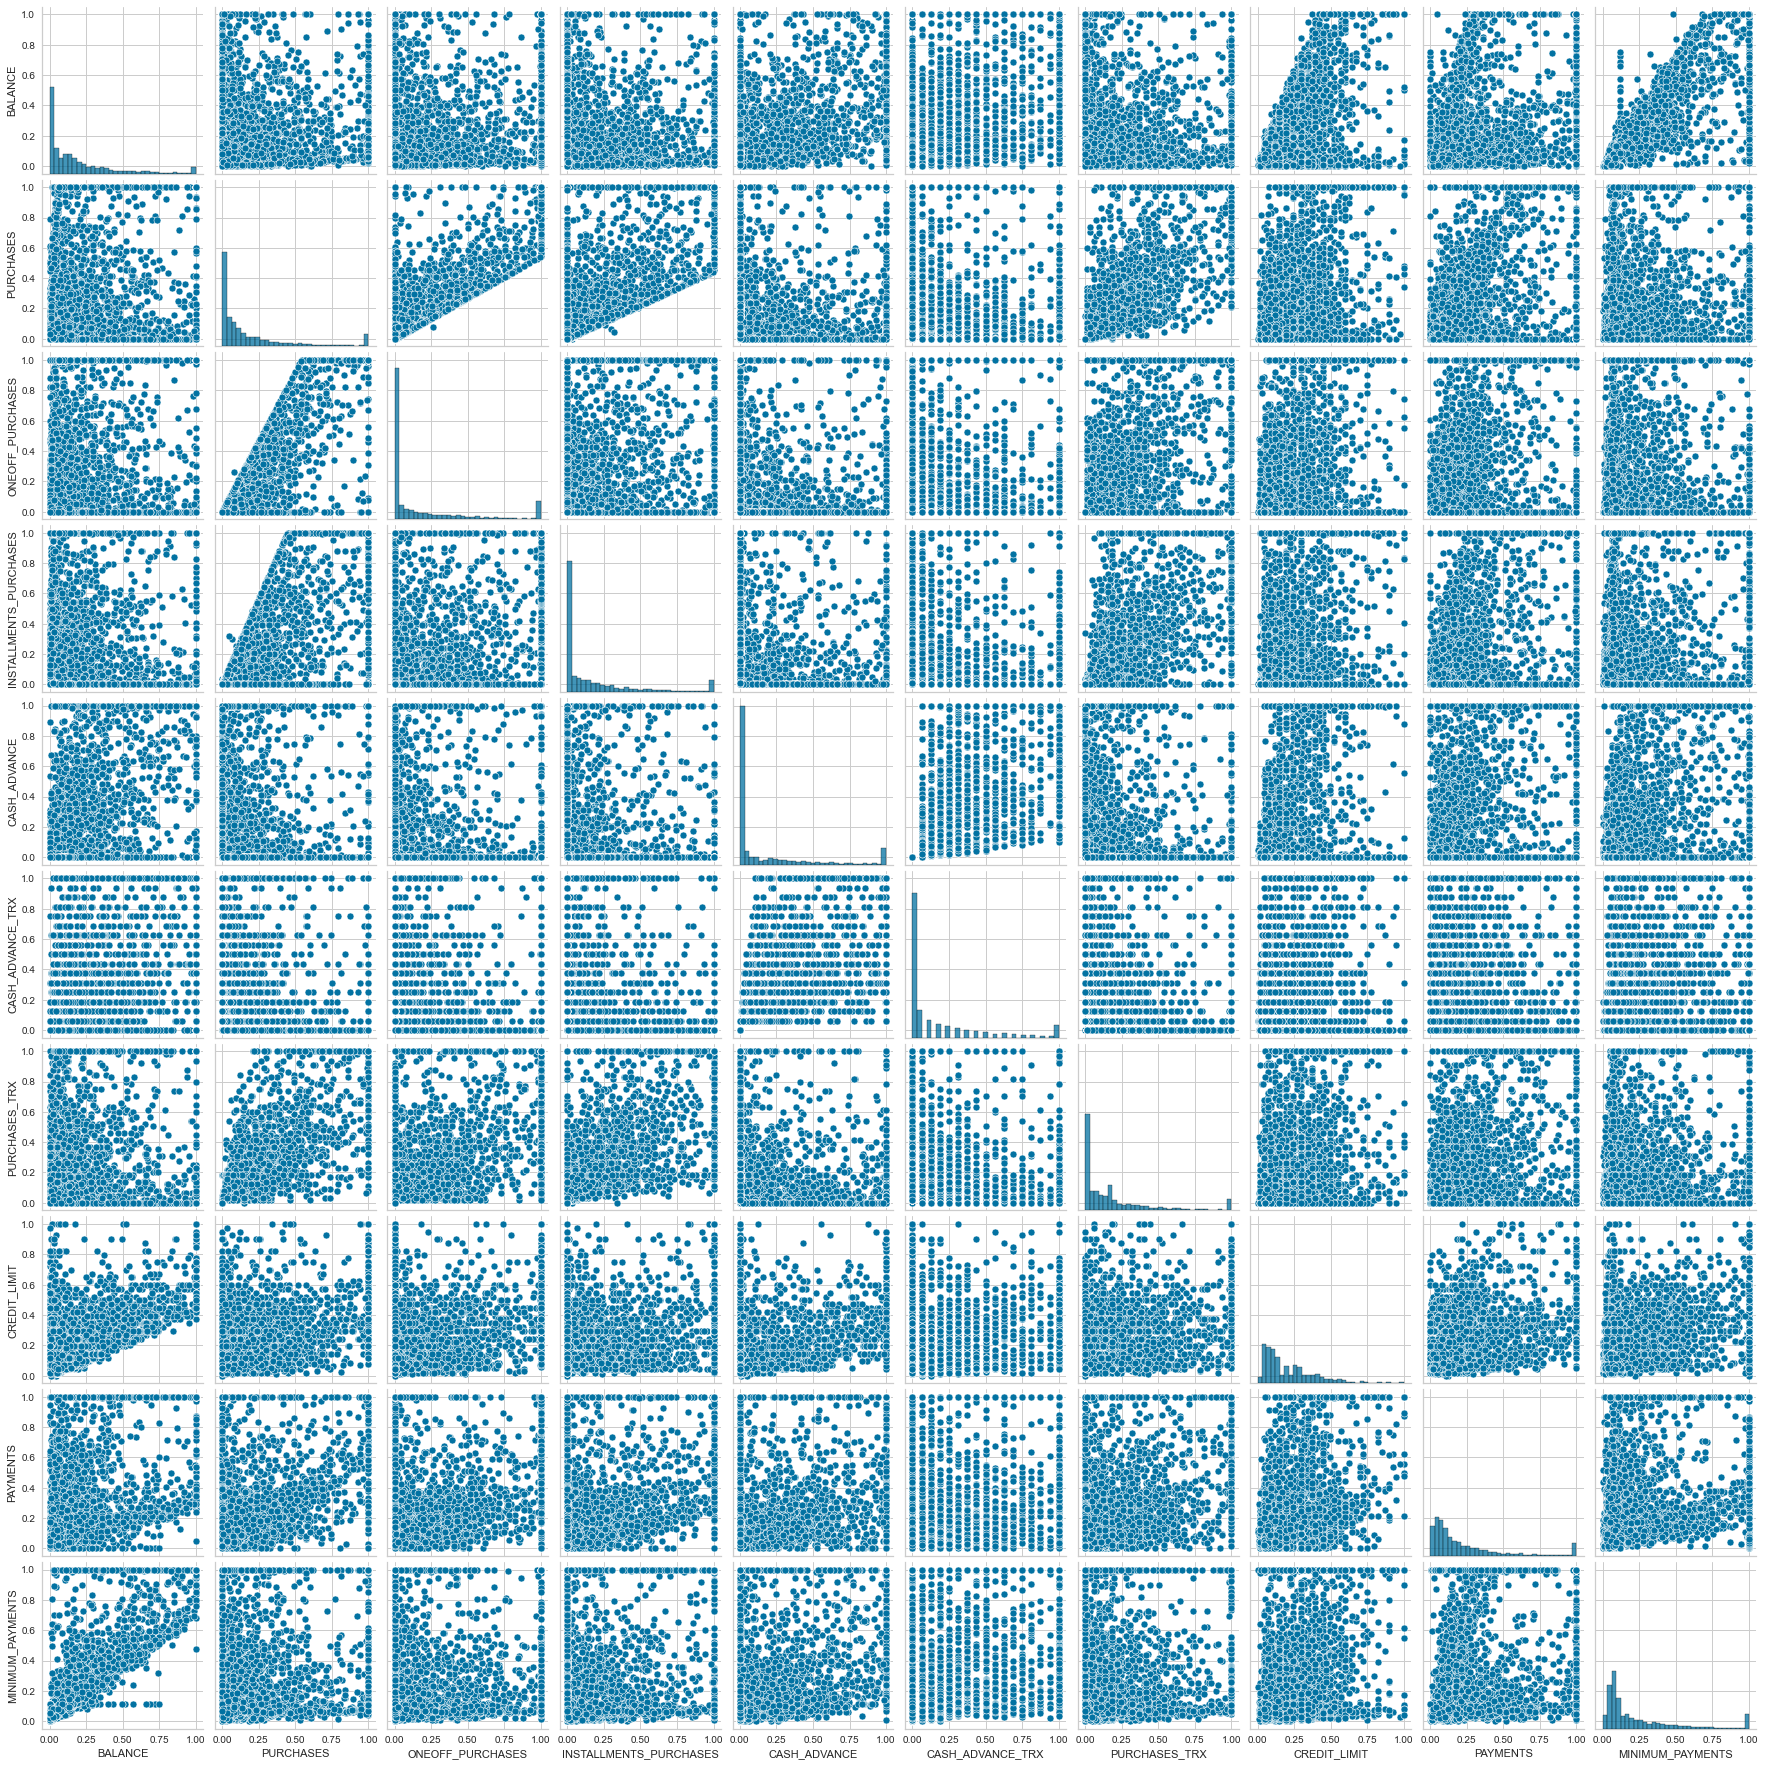

In [28]:
# lets get the pairplot for the data
sns.pairplot(train_scaled)
plt.show()

Kami mengamati beberapa tren berikut di sini:

- Dengan meningkatnya credit limit, maka balance juga meningkat sehingga hubungan linier
- Saat jumlah purchases meningkat, jumlah cash advance trx berkurang
- purchases, one off purchases, dan installments purchases semuanya terkait secara linier
- Karena credit limit rendah, cash advance trx lebih sedikit

In [29]:
vif_data = pd.DataFrame()
vif_data['feature'] = train_clean.columns

vif_data['VIF'] = [variance_inflation_factor(train_clean.values, i) for i in range(len(train_clean.columns))]

vif_data

feature        VIF
0                            BALANCE   7.779946
1                  BALANCE_FREQUENCY   4.736460
2                          PURCHASES  34.263107
3                   ONEOFF_PURCHASES  16.487519
4             INSTALLMENTS_PURCHASES   9.953347
5                       CASH_ADVANCE   4.444985
6                PURCHASES_FREQUENCY   4.660665
7         ONEOFF_PURCHASES_FREQUENCY   1.685060
8   PURCHASES_INSTALLMENTS_FREQUENCY   3.353818
9             CASH_ADVANCE_FREQUENCY   1.040278
10                  CASH_ADVANCE_TRX   3.577677
11                     PURCHASES_TRX   6.632239
12                      CREDIT_LIMIT   4.867179
13                          PAYMENTS   3.668321
14                  MINIMUM_PAYMENTS   5.363341
15                  PRC_FULL_PAYMENT   1.148069
16                            TENURE   5.871818

Berdasarkan hasil uji multikolinearitas dengan menggunakan variance inflation factor (VIF), terlihat bahwa hanya ada 7 feature yang saling berkaitan dengan feature lainnya atau memiliki kolinearitas yang tinggi terhadap lainnya yaitu balance, purchases, oneoff_purchases, installments_purchases, purchases_trx, minimum_payments, dan tenure. Akan tetapi terdapat 3 feature yang memiliki nilai koefisien terendah yang artinya paling tidak berkaitan dengan feature lainnya yaitu oneoff_purchases, cash_advance_frequency, dan prc_full_payment. Selanjutnya untuk melakukan reduksi dimensi, hasilnya akan dicocokkan dengan hasil analisis komponen utama (PCA). Hal ini dapat diprediksi bahwa jika dilakukan reduksi dimensi, maka paling tidak dapat direduksi sampai 10 dimensi

### PRINCIPAL COMPONEN ANALYSIS (PCA)

In [30]:
# reducing dimentionality with PCA
pca_scaled=PCA(n_components=10).fit(train_scaled)
pca_scaled.explained_variance_ratio_

array([0.37448337, 0.30860392, 0.09340341, 0.07667497, 0.05148179,
       0.03483746, 0.02346646, 0.02207956, 0.01205628, 0.00291277])

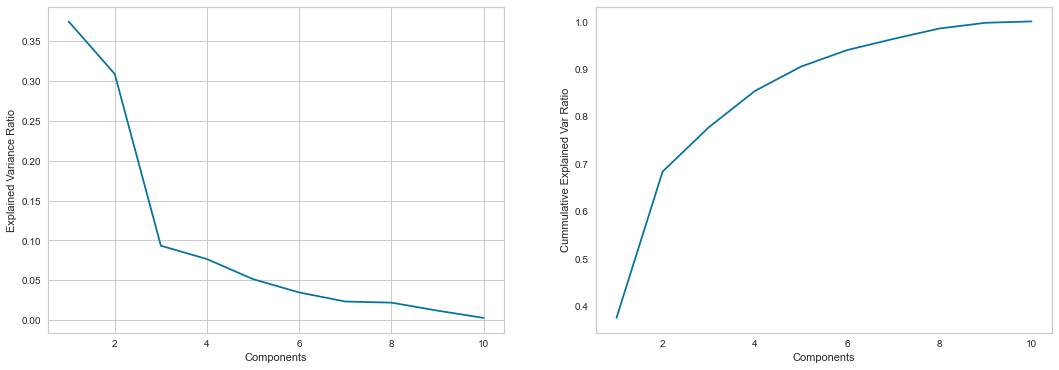

In [31]:
fig,ax=plt.subplots(ncols=2,figsize=(18,6))
plt.grid()
ax[0].plot(range(1,11),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Components')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,11),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Components')
ax[1].set_ylabel('Cummulative Explained Var Ratio')
plt.show()

Berdasarkan hasil variance ratio pada PCA terlihat bahwa nampak ada patahan di 3 komponen, dengan cumsum EVR di atas 0.70, kemungkinan 3 komponen merupakan jumlah yang terbaik dengan cumsum EVR sekitar 75%.

In [32]:
cumsum = np.cumsum(pca_scaled.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= 0.75) + 1
print("dimension : ", d)

[0.37448337 0.6830873  0.77649071 0.85316568 0.90464747 0.93948493
 0.96295139 0.98503095 0.99708723 1.        ]
dimension :  3


Kami memutuskan untuk menggunakan 3 total komponen yang akan digunakan pada model clustering.

In [33]:
pca = PCA(n_components=3)
train_pca = pca.fit_transform(train_scaled)

## VII. MACHINE LEARNING MODELS

#### KMeans

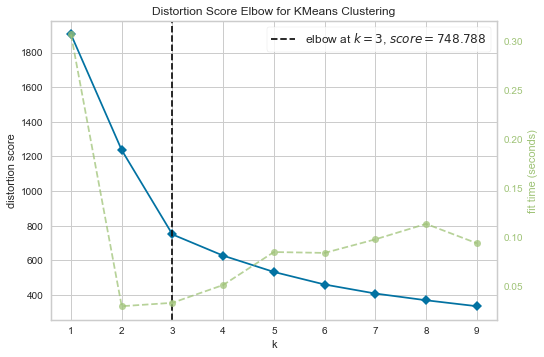

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# defining models
km1_model = KMeans(n_clusters=(2,10), max_iter=500, random_state=1, algorithm='elkan') 

# Showing elbow point
Elbow_M = KElbowVisualizer(km1_model, k=(1,10))
Elbow_M.fit(train_pca)
Elbow_M.show()

dari gambar diatas didapatkan kemungkinan jumlah cluster yang paling optimal adalah 3

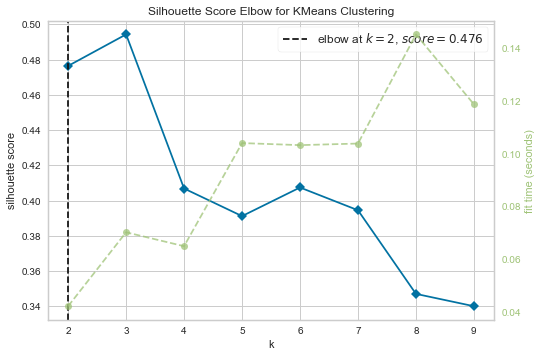

In [35]:
model = KMeans(n_clusters=(2,10), max_iter=500, random_state=1, algorithm='elkan')
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(train_pca)
visualizer.show()
plt.show()

Metode skor Silhouette menunjukkan pilihan terbaik adalah 2 cluster. Mari kita bandingkan semuanya.

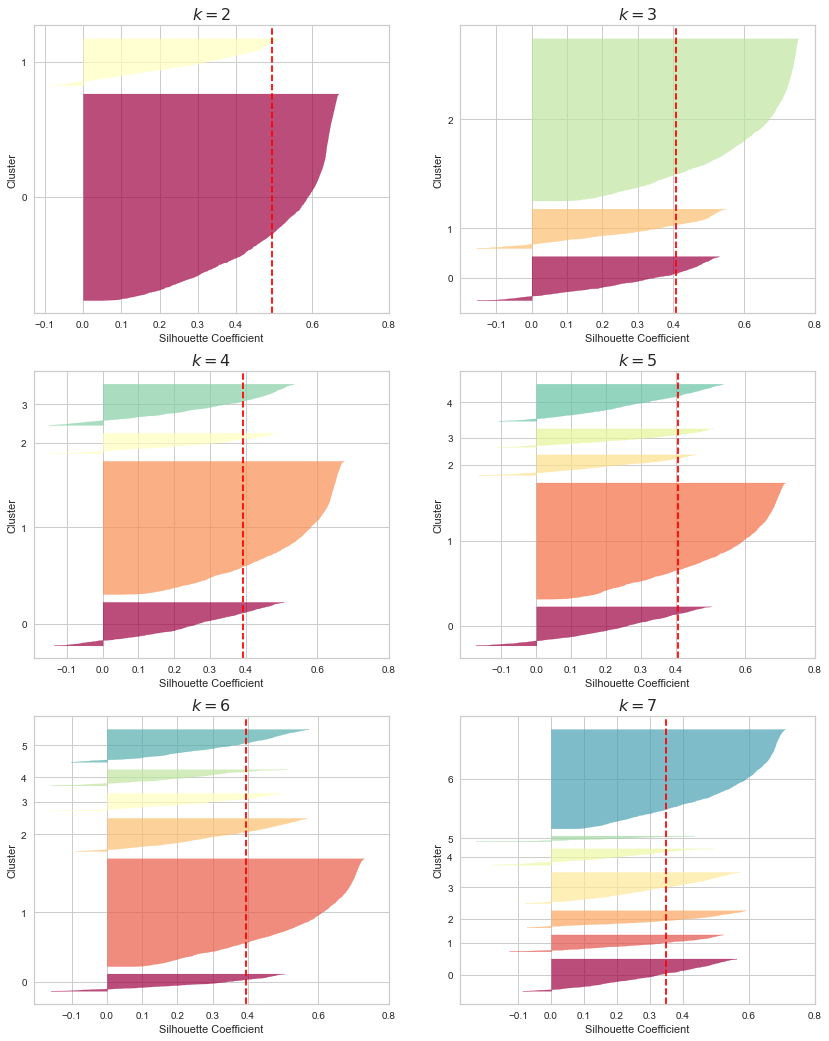

In [36]:
kmeans_models = [KMeans(n_clusters=k, max_iter=500, random_state=1, algorithm='elkan').fit(train_pca) for k in range (1, 10)]
silhouette_scores = [silhouette_score(train_pca, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(14, 18))

for k in (2, 3, 4, 5, 6, 7):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_models[k-1].labels_
    silhouette_coefficients = silhouette_samples(train_pca, y_pred)

    padding = len(train_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 3, 4, 5, 6, 7):
        plt.ylabel("Cluster")
    
    if k in (2, 3, 4, 5, 6, 7):
        plt.gca().set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Berdasarkan hasil perhitungan pada metode siluet terlihat bahwa tidak ada cluster yang memiliki bentuk yang sama, meskipun semuanya telah melewati skor siluet. Namun jika dilihat lebih dekat, cluster 2 dan cluster 3 memiliki hasil yang lebih baik dibandingkan cluster lainnya. Jika dibandingkan antara kedua klaster, klaster 2 akan menghasilkan model dengan overlap yang lebih sedikit karena grafik siluet menunjukkan bahwa terdapat lebih sedikit kelas dengan nilai di bawah 0 dibandingkan dengan klaster 3. Oleh karena itu, diputuskan untuk menggunakan 2 klaster untuk pemodelan K-Mean.

In [37]:
# MODEL DEFINITION
kmeans = KMeans(n_clusters=2, max_iter=500, random_state=1, algorithm='elkan')
kmeans.fit(train_pca)

KMeans(algorithm='elkan', max_iter=500, n_clusters=2, random_state=1)

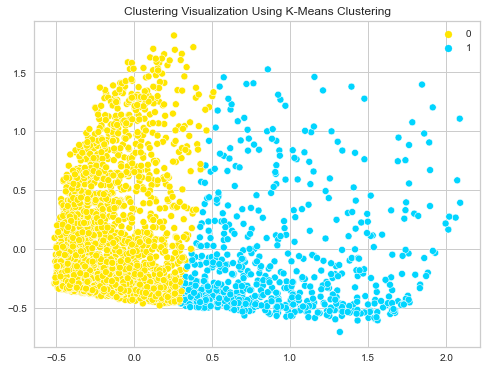

In [38]:
# MODEL VISUALIZATION
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=kmeans.labels_, palette='jet_r')
ax.set_title('Clustering Visualization Using K-Means Clustering');

Berdasarkan hasil plotting model clustering K-Means hasilnya cukup baik. Batas-batas kedua klaster terlihat jelas, dan tidak begitu banyak tumpang tindih antar klaster

#### AGGLOMERATIVE CLUSTERING

In [39]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg.fit(train_pca)

AgglomerativeClustering()

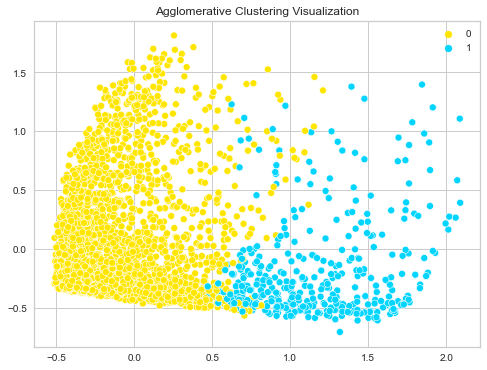

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=agg.labels_, palette='jet_r')
ax.set_title('Agglomerative Clustering Visualization');

Hasil plotting pada model pengelompokan agglomerative menunjukkan adanya klaster dengan batas yang terlihat jelas antar klaster. Namun batasan antar cluster tidak begitu baik jika dibandingkan dengan model K-Means. Setelah ini kami akan mencoba satu lagi model clustering yaitu Spectral Clustering untuk memberi kami lebih banyak perbandingan.

#### SPECTRAL CLUSTERING

In [41]:
scl = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
scl.fit(train_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

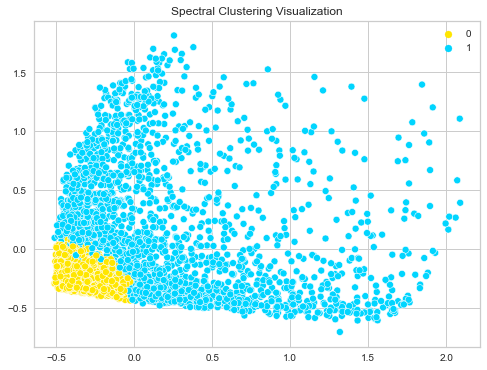

In [42]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=scl.labels_, palette='jet_r')
ax.set_title('Spectral Clustering Visualization');

Hasil plotting pada metode spectral clustering menunjukkan model dengan batas antar cluster yang masih dapat terlihat. Namun jumlah overlapping data antar cluster yang terjadi lebih banyak jika dibandingkan dengan model K-Means sebelumnya.

Secara umum jika dilihat dari hasil sebaran data kelas pada hasil visualisasi model yang telah dilakukan, sejauh ini model K-Means memberikan performansi yang lebih baik dibandingkan kedua metode clustering lainnya. Selanjutnya kita akan melihat perbandingan model evaluasi yang akan dilakukan dengan menggunakan perhitungan Silhouette Score, Davies Bouldin Score, dan Calinski-Harbasz Score, kemudian membandingkan hasilnya.

### TRAINED MODEL SCORE COMPARISON

In [43]:
result_comp = pd.DataFrame({'Model' : ['K-Means', 'Agglomerative', 'Spectral'],
                  'Silhouete Score' : [silhouette_score(train_pca, kmeans.labels_), silhouette_score(train_pca, agg.labels_), silhouette_score(train_pca, scl.labels_)],
                  'Davies Score' : [davies_bouldin_score(train_pca, kmeans.labels_), davies_bouldin_score(train_pca, agg.labels_), davies_bouldin_score(train_pca, scl.labels_)],
                  'Calinski Score' : [calinski_harabasz_score(train_pca, kmeans.labels_), calinski_harabasz_score(train_pca, agg.labels_), calinski_harabasz_score(train_pca, scl.labels_)]})
result_comp

Model  Silhouete Score  Davies Score  Calinski Score
0        K-Means         0.476420      1.027486     1930.958278
1  Agglomerative         0.506156      0.857015     1652.276581
2       Spectral         0.222568      1.372572      941.819899

Nilai siluet pada model k-means adalah 0,476420, sedangkan model spektral adalah 0,222568	, dan model agglomeratif adalah 0,506156. Kemudian skor Davies pada model k-means adalah 1.027486, sedangkan model spektral adalah 1.372572, dan model agglomeratif adalah 0.857015. Skor calinski-harabasz pada model k-means adalah 1930.958278, sedangkan model spektral adalah 941.819899, dan model agglomeratif adalah 1652.276581.

Berdasarkan hasil evaluasi, k-means clustering merupakan model dengan kinerja terbaik dalam perhitungan evaluasi, yaitu pada skor calinski-harabasz memiliki skor tertinggi, jika dilihat dari perhitungan silhouette score dan davies score memiliki urutan kedua diantara lainnya namun jarak skor K-means dengan skor tertinggi tidak terlalu jauh. Maka dapat kita pilih model yang baik dalam menentukan cluster pada data ini yaitu K-Means model.

Selain itu, hasil perhitungan ini juga didukung oleh hasil visualisasi cluster pada masing-masing model yang menunjukkan bahwa k-means clustering merupakan model clustering dengan batas antar cluster yang paling jelas dan hanya sedikit data yang tumpang tindih antar cluster di antara model clustering lainnya.

## VIII. ML MODELS TEST

In [44]:
test_cleaned = wins.transform(test)

In [45]:
test_cleaned_scaled = scaler.transform(test_cleaned[num_col])
test_scaled=pd.DataFrame(test_cleaned_scaled, columns=test_cleaned[num_col].columns)

In [46]:
test_pca = pca.transform(test_scaled)

In [47]:
# K-Means Test
kmeans_test = KMeans(n_clusters=2, max_iter=500, random_state=1, algorithm='elkan')
kmeans_test.fit(test_pca)

KMeans(algorithm='elkan', max_iter=500, n_clusters=2, random_state=1)

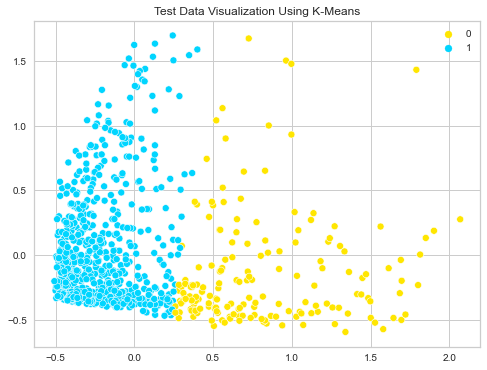

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=test_pca[:,0], y=test_pca[:,1], hue=kmeans_test.labels_, palette='jet_r')
ax.set_title('Test Data Visualization Using K-Means');

Terlihat dari grafik di atas bahwa memiliki cluster yang sama dengan model training K-Means.

## IX. MODEL INFERENCE

In [49]:
# showing inference data
df_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2065    42.522715                  0     479.50              0.00   
827    305.720290                  1    1125.80            430.88   
3310  2724.169852                  1      49.00             49.00   
4246  1919.099019                  1     240.27            102.26   
2087    40.661132                  0     235.30              0.00   
4320  2571.284657                  1       0.00              0.00   
2031   134.581135                  0    2300.42           2093.42   
3581   704.910363                  1     500.50            225.50   
2812  1630.676858                  1       0.00              0.00   
3387   432.385707                  1    2171.86           1048.28   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2065                  479.50      0.000000                    0   
827                   694.92      0.000000                    1   
3310                    0.00    189.855977                    0   
4246                  138.01   2116.077457                    0   
2087                  235.30      0.000000                    0   
4320                    0.00    259.611243                    0   
2031                  207.00      0.000000                    0   
3581                  275.00    851.158327                    1   
2812                    0.00    275.166058                    0   
3387                 1123.58    138.677510                    0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2065                           0                                 0   
827                            0                                 1   
3310                           0                                 0   
4246                           0                                 0   
2087                           0                                 0   
4320                           0                                 0   
2031                           0                                 0   
3581                           0                                 1   
2812                           0                                 0   
3387                           0                                 0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2065                       0                 0             17        1000.0   
827                        0                 0             17        3000.0   
3310                       0                 1              1        3000.0   
4246                       0                17             11        3200.0   
2087                       0                 0             10        1000.0   
4320                       0                 7              0        2750.0   
2031                       0                 0             13        6000.0   
3581                       0                 6             18        1200.0   
2812                       0                 1              0        1950.0   
3387                       0                 1             20        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2065   585.313820        155.528119                 0      12  
827   1863.122757        204.442058                 0      12  
3310   558.687221       1164.897621                 0      12  
4246   763.674122        744.713817                 0      12  
2087   279.234480        161.075173                 0      12  
4320   750.534962        883.249328                 0      12  
2031  3251.065775        154.277109                 1      12  
3581  1713.299924        425.812312                 0      12  
2812   558.164261        495.630406                 0      11  
3387  1980.281176        195.203093                 0      12

In [50]:
# scaling inference data
x_inf=scaler.transform(df_inf[num_col])
inf_scaled=pd.DataFrame(x_inf, columns=df_inf[num_col].columns)
# reducing dimensions
xp_inf=pca.transform(inf_scaled)
xp_inf

array([[-0.21076731, -0.37400281, -0.05237066],
       [ 0.08665928, -0.35019162,  0.0110196 ],
       [-0.3283841 ,  0.04237852, -0.29592371],
       [-0.23154477,  0.66417238,  0.28320975],
       [-0.34971165, -0.3450525 , -0.02655612],
       [-0.36525262,  0.20010553, -0.09869446],
       [ 0.52833063, -0.35976342,  0.4288637 ],
       [-0.11072572,  0.03264705,  0.13967983],
       [-0.41802163, -0.09489894, -0.09050452],
       [ 0.43046656, -0.39453638,  0.0983831 ]])

In [51]:
# Predicting clusters
y_pred_inf=kmeans.predict(xp_inf)
y_pred_inf

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [52]:
# changing prediction into dataframe
y_pred_inf_df=pd.DataFrame(y_pred_inf,columns=['category'])
# joining prediction with inferential data
df_inf_pred=pd.concat([inf_scaled.reset_index(drop=True), df_inf[cat_col].reset_index(drop=True), y_pred_inf_df], axis=1)
df_inf_pred

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  0.005268   0.111038          0.000000                0.249740   
1  0.037876   0.260703          0.183155                0.361937   
2  0.337501   0.011347          0.020829                0.000000   
3  0.237760   0.055640          0.043468                0.071880   
4  0.005038   0.054489          0.000000                0.122552   
5  0.318560   0.000000          0.000000                0.000000   
6  0.016673   0.532711          0.889855                0.107812   
7  0.087332   0.115901          0.095854                0.143229   
8  0.202027   0.000000          0.000000                0.000000   
9  0.053569   0.502941          0.445595                0.585198   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0      0.000000            0.0000       0.261538      0.042821  0.090307   
1      0.000000            0.0000       0.261538      0.143577  0.287456   
2      0.042999            0.0625       0.015385      0.143577  0.086198   
3      0.479259            1.0625       0.169231      0.153652  0.117825   
4      0.000000            0.0000       0.153846      0.042821  0.043082   
5      0.058798            0.4375       0.000000      0.130982  0.115798   
6      0.000000            0.0000       0.200000      0.294710  0.501598   
7      0.192774            0.3750       0.276923      0.052897  0.264340   
8      0.062321            0.0625       0.000000      0.090680  0.086118   
9      0.031408            0.0625       0.307692      0.052897  0.305532   

   MINIMUM_PAYMENTS  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0          0.057873                  0                    0   
1          0.076078                  1                    1   
2          0.433554                  1                    0   
3          0.277164                  1                    0   
4          0.059937                  0                    0   
5          0.328726                  1                    0   
6          0.057407                  0                    0   
7          0.158471                  1                    1   
8          0.184456                  1                    0   
9          0.072639                  1                    0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                           0                                 0   
1                           0                                 1   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   
5                           0                                 0   
6                           0                                 0   
7                           0                                 1   
8                           0                                 0   
9                           0                                 0   

   CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  TENURE  category  
0                       0                 0      12         0  
1                       0                 0      12         0  
2                       0                 0      12         0  
3                       0                 0      12         0  
4                       0                 0      12         0  
5                       0                 0      12         0  
6                       0                 1      12         1  
7                       0                 0      12         0  
8                       0                 0      11         0  
9                       0                 0      12         1

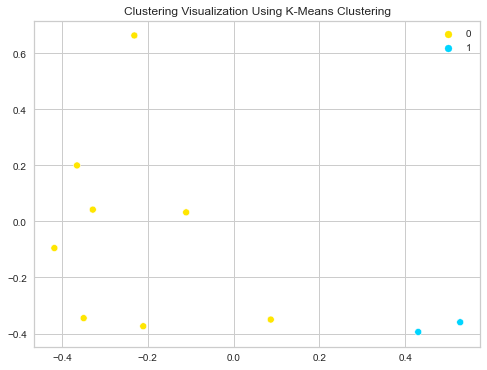

In [53]:
# MODEL VISUALIZATION

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=xp_inf[:,0], y=xp_inf[:,1], hue=y_pred_inf, palette='jet_r')
ax.set_title('Clustering Visualization Using K-Means Clustering');

## X. EXPLORATORY DATA ANALYSIS BASED ON CLUSTERING RESULT

**CONCATENATING CLUSTERING RESULT INTO ORIGINAL DATA**

Sekarang, kami akan menggabungkan label train dan test dari model K-Mean untuk melatih dan menguji data, lalu menggabungkan kembali data train dan test menjadi satu sehingga kami dapat menganalisis karakteristik kluster.

In [54]:
train['cluster_id'] = kmeans.labels_
test['cluster_id'] = kmeans_test.labels_

In [55]:
clust_df = pd.concat([train, test], axis=0, ignore_index=True)
clust_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      363.344239                  0     665.86            234.98   
1     1935.362486                  1    4915.60           4515.34   
2     4315.123399                  1    3927.58           2238.34   
3       80.178891                  1    1200.00              0.00   
4      442.111046                  1     671.36              0.00   
...           ...                ...        ...               ...   
4460    77.866345                  0    1403.34              0.00   
4461   203.629630                  0       0.00              0.00   
4462    72.766970                  1       0.00              0.00   
4463   120.220573                  1    1348.08            230.43   
4464  1594.994317                  0     667.00            569.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     430.88      0.000000                    0   
1                     400.26    293.844792                    1   
2                    1689.24      0.000000                    1   
3                    1200.00      0.000000                    1   
4                     671.36    777.528996                    0   
...                      ...           ...                  ...   
4460                 1403.34      0.000000                    0   
4461                    0.00    589.991614                    0   
4462                    0.00    952.855308                    0   
4463                 1117.65      0.000000                    1   
4464                   98.00   1880.647102                    0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                              0                                 0   
1                              1                                 0   
2                              0                                 1   
3                              0                                 0   
4                              0                                 0   
...                          ...                               ...   
4460                           0                                 0   
4461                           0                                 0   
4462                           0                                 0   
4463                           0                                 1   
4464                           0                                 0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                          0                 0             34        4000.0   
1                          0                 1             50        9000.0   
2                          0                 0             21       11000.0   
3                          0                 0             12        1200.0   
4                          0                 1             13        3000.0   
...                      ...               ...            ...           ...   
4460                       0                 0              6        4000.0   
4461                       0                 2              0        3000.0   
4462                       0                 1              0        2500.0   
4463                       0                 0             50       12000.0   
4464                       0                 5              8        2500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_id  
0     1734.889908        232.164739                 0      12           0  
1     4921.066897        594.756686                 0      12           1  
2     1518.432988       1317.325470                 0      12           1  
3     1037.627280        165.880254                 1      12           0  
4       63.199553        210.928816                 0      12           0  
...           ...               ...               ...     ...         ...  
4460  1865.579842         95.577384                 0 

**VISUALIZATION FROM EACH COLUMN BASED ON THE CLUSTER**

[Text(0, 0, '3088'), Text(0, 0, '1377')]

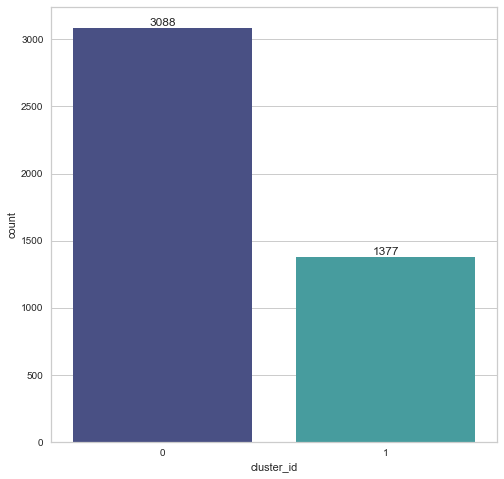

In [56]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=clust_df, x='cluster_id', palette='mako')
ax.bar_label(ax.containers[0], label_type='edge')

Berdasarkan visualisasi ini dapat kita lihat bahwa cluster 0 memiliki jumlah terbanyak dibandingkan dengan cluster 1

<Figure size 864x864 with 0 Axes>

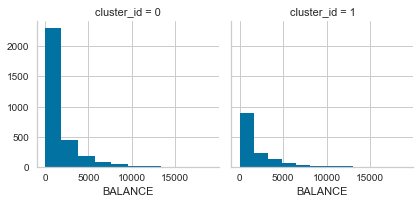

<Figure size 864x864 with 0 Axes>

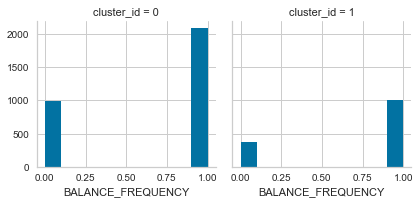

<Figure size 864x864 with 0 Axes>

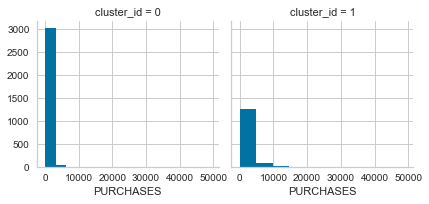

<Figure size 864x864 with 0 Axes>

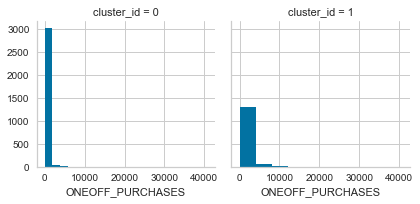

<Figure size 864x864 with 0 Axes>

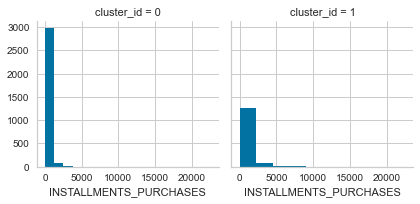

<Figure size 864x864 with 0 Axes>

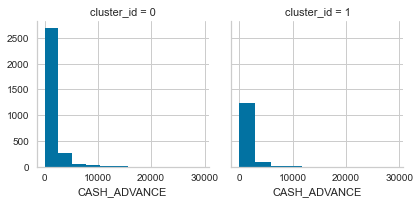

<Figure size 864x864 with 0 Axes>

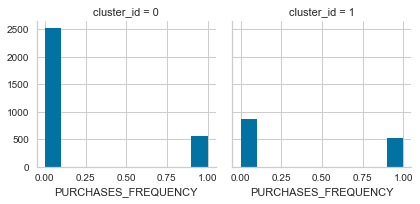

<Figure size 864x864 with 0 Axes>

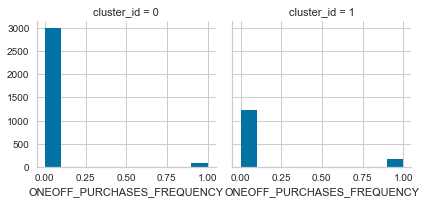

<Figure size 864x864 with 0 Axes>

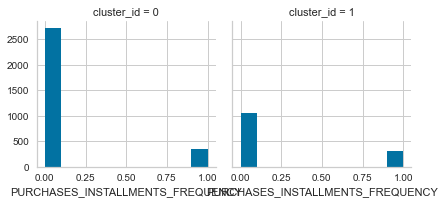

<Figure size 864x864 with 0 Axes>

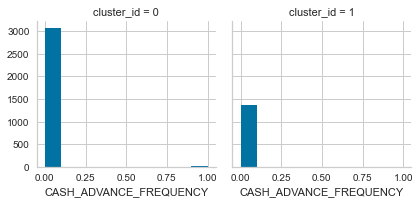

<Figure size 864x864 with 0 Axes>

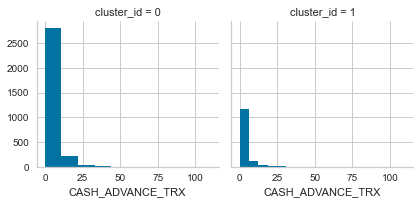

<Figure size 864x864 with 0 Axes>

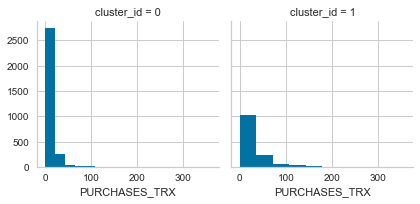

<Figure size 864x864 with 0 Axes>

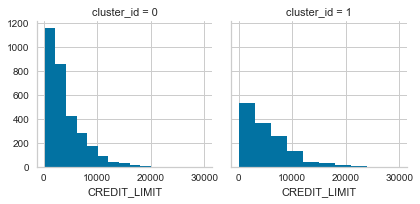

<Figure size 864x864 with 0 Axes>

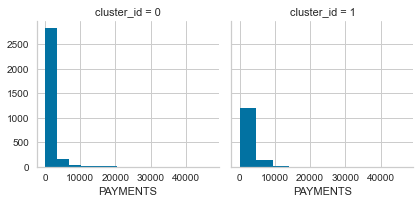

<Figure size 864x864 with 0 Axes>

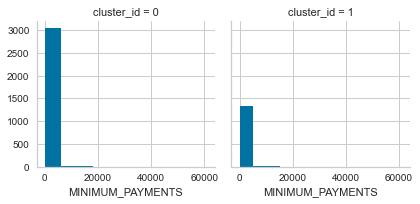

<Figure size 864x864 with 0 Axes>

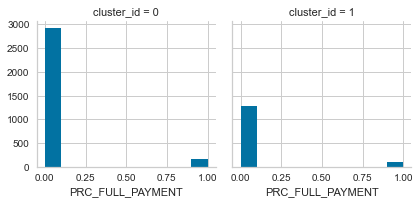

<Figure size 864x864 with 0 Axes>

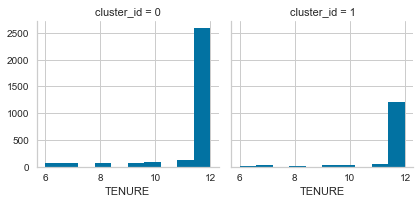

<Figure size 864x864 with 0 Axes>

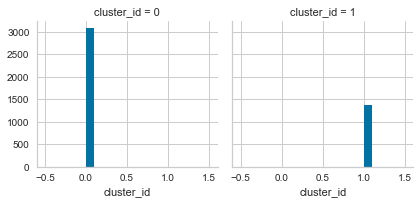

In [57]:
for cols in clust_df:
    g = sns.FacetGrid(clust_df, col = 'cluster_id')
    plt.figure(figsize=(12,12))
    g.map(plt.hist, cols)

In [58]:
clust_df[clust_df['cluster_id'] == 0].describe().T

count         mean          std  \
BALANCE                           3088.0  1478.160836  1999.232110   
BALANCE_FREQUENCY                 3088.0     0.677785     0.467401   
PURCHASES                         3088.0   542.732500  1115.678354   
ONEOFF_PURCHASES                  3088.0   293.756279   786.485574   
INSTALLMENTS_PURCHASES            3088.0   249.394835   547.964173   
CASH_ADVANCE                      3088.0  1001.125472  2102.507415   
PURCHASES_FREQUENCY               3088.0     0.181995     0.385903   
ONEOFF_PURCHASES_FREQUENCY        3088.0     0.026231     0.159846   
PURCHASES_INSTALLMENTS_FREQUENCY  3088.0     0.115285     0.319417   
CASH_ADVANCE_FREQUENCY            3088.0     0.004534     0.067191   
CASH_ADVANCE_TRX                  3088.0     3.312176     6.679072   
PURCHASES_TRX                     3088.0     9.118847    14.022535   
CREDIT_LIMIT                      3088.0  4073.666163  3354.848845   
PAYMENTS                          3088.0  1372.822422  2342.885014   
MINIMUM_PAYMENTS                  3088.0   787.642096  2240.649065   
PRC_FULL_PAYMENT                  3088.0     0.050842     0.219710   
TENURE                            3088.0    11.472798     1.407292   
cluster_id                        3088.0     0.000000     0.000000   

                                         min          25%          50%  \
BALANCE                             0.000000    99.493172   848.546777   
BALANCE_FREQUENCY                   0.000000     0.000000     1.000000   
PURCHASES                           0.000000     0.000000   258.820000   
ONEOFF_PURCHASES                    0.000000     0.000000     0.000000   
INSTALLMENTS_PURCHASES              0.000000     0.000000    31.265000   
CASH_ADVANCE                        0.000000     0.000000    28.092212   
PURCHASES_FREQUENCY                 0.000000     0.000000     0.000000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.000000   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     1.000000   
PURCHASES_TRX                       0.000000     0.000000     5.000000   
CREDIT_LIMIT                      150.000000  1500.000000  3000.000000   
PAYMENTS                            0.000000   339.679748   705.714773   
MINIMUM_PAYMENTS                    0.037744   167.994730   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   
cluster_id                          0.000000     0.000000     0.000000   

                                          75%          max  
BALANCE                           1916.351686  19043.13856  
BALANCE_FREQUENCY                    1.000000      1.00000  
PURCHASES                          698.042500  31299.35000  
ONEOFF_PURCHASES                   311.712500  19064.30000  
INSTALLMENTS_PURCHASES             324.625000  12560.85000  
CASH_ADVANCE                      1146.421545  26194.04954  
PURCHASES_FREQUENCY                  0.000000      1.00000  
ONEOFF_PURCHASES_FREQUENCY           0.000000      1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000      1.00000  
CASH_ADVANCE_FREQUENCY               0.000000      1.00000  
CASH_ADVANCE_TRX                     4.000000    110.00000  
PURCHASES_TRX                       12.000000    216.00000  
CREDIT_LIMIT                      6000.000000  20000.00000  
PAYMENTS                          1455.564777  34107.07499  
MINIMUM_PAYMENTS                   753.429589  61031.61860  
PRC_FULL_PAYMENT                     0.000000      1.00000  
TENURE                              12.000000     12.00000  
cluster_id                           0.000000      0.00000

In [59]:
clust_df[clust_df['cluster_id'] == 1].describe().T

count         mean          std  \
BALANCE                           1377.0  1765.895027  2277.173500   
BALANCE_FREQUENCY                 1377.0     0.726216     0.446061   
PURCHASES                         1377.0  2037.816187  3398.081761   
ONEOFF_PURCHASES                  1377.0  1250.900850  2646.684818   
INSTALLMENTS_PURCHASES            1377.0   787.184205  1386.188386   
CASH_ADVANCE                      1377.0   915.685674  2207.215501   
PURCHASES_FREQUENCY               1377.0     0.376180     0.484602   
ONEOFF_PURCHASES_FREQUENCY        1377.0     0.114742     0.318826   
PURCHASES_INSTALLMENTS_FREQUENCY  1377.0     0.230937     0.421585   
CASH_ADVANCE_FREQUENCY            1377.0     0.001452     0.038097   
CASH_ADVANCE_TRX                  1377.0     2.936093     6.083382   
PURCHASES_TRX                     1377.0    26.564270    35.284481   
CREDIT_LIMIT                      1377.0  5450.591976  4140.225751   
PAYMENTS                          1377.0  2522.310028  3908.389576   
MINIMUM_PAYMENTS                  1377.0   944.593889  2331.524240   
PRC_FULL_PAYMENT                  1377.0     0.072622     0.259609   
TENURE                            1377.0    11.611474     1.203537   
cluster_id                        1377.0     1.000000     0.000000   

                                         min          25%          50%  \
BALANCE                             0.000000   228.925466   920.529926   
BALANCE_FREQUENCY                   0.000000     0.000000     1.000000   
PURCHASES                           0.000000   194.570000  1210.310000   
ONEOFF_PURCHASES                    0.000000     0.000000   400.000000   
INSTALLMENTS_PURCHASES              0.000000     0.000000   300.010000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.000000     0.000000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.000000   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     4.000000    14.000000   
CREDIT_LIMIT                      150.000000  2000.000000  4500.000000   
PAYMENTS                            0.000000   560.136623  1405.747523   
MINIMUM_PAYMENTS                    1.113027   177.721392   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   
cluster_id                          1.000000     1.000000     1.000000   

                                          75%          max  
BALANCE                           2420.761135  16304.88925  
BALANCE_FREQUENCY                    1.000000      1.00000  
PURCHASES                         2590.270000  49039.57000  
ONEOFF_PURCHASES                  1620.690000  40761.25000  
INSTALLMENTS_PURCHASES            1090.000000  22500.00000  
CASH_ADVANCE                       914.843621  29282.10915  
PURCHASES_FREQUENCY                  1.000000      1.00000  
ONEOFF_PURCHASES_FREQUENCY           0.000000      1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000      1.00000  
CASH_ADVANCE_FREQUENCY               0.000000      1.00000  
CASH_ADVANCE_TRX                     3.000000     62.00000  
PURCHASES_TRX                       36.000000    358.00000  
CREDIT_LIMIT                      7500.000000  30000.00000  
PAYMENTS                          2948.963493  46930.59824  
MINIMUM_PAYMENTS                   886.458108  50260.75947  
PRC_FULL_PAYMENT                     0.000000      1.00000  
TENURE                              12.000000     12.00000  
cluster_id                           1.000000      1.00000

**ANALYSIS OF THE NEW DATA LABELED WITH CLUSTERS**

Berikut rincian analisis dari grafik yang ditampilkan di atas

> Cluster 0

Berdasarkan describe dari cluster 0 maka dapat kita simpulkan untuk karakteristik yang terdapat pada cluster 0, yaitu:

- Saldo(Balance) tersisa di akun mereka hingga sekitar 19.000 USD
- Berdasarkan Balance frequency dengan rata-rata 0,6 yg mencodong ke angka 1 maka cluster 0 memiliki karakteristik yang suka memeriksa saldo mereka
- Nilai setiap pembelian(purchases) termasuk kecil
- Frekuensi pembelian mereka rendah
- Nilai pembelian satu kali(oneoff purchases) mereka sangat kecil dan jarang
- Sering membelanjakan uang mereka untuk pembelian cicilan(installments purchases) tetapi dalam jumlah kecil
- Sering menggunakan metode cash advance
- Batas kredit mereka mencapai 20.000 USD
- Jarang melakukan pembayaran pembelian penuh(prc full payment)
- Jumlah pembayaran minimum(minimum payments) tinggi dengan nilai 61.000

> Cluster 1

Berdasarkan describe dari cluster 1 maka dapat kita simpulkan untuk karakteristik yang terdapat pada cluster 1, yaitu:

- Saldo(Balance) tersisa di akun mereka lebih sedikit dibandingkan cluster 0 dengan maksimum sekitar 16.000 USD
- Berdasarkan Balance frequency dengan rata-rata 0,7 yg sangat mencodong ke angka 1 maka cluster 0 memiliki karakteristik yang sering memeriksa atau memperbarui saldo mereka
- Nilai setiap pembelian(purchases) termasuk besar dengan maksimum mencapai 49.000 USD
- Frekuensi pembelian mereka tinggi
- Nilai pembelian satu kali(oneoff purchases) mereka jauh lebih besar dibandingkan cluster 0
- Sering membelanjakan uang mereka untuk pembelian cicilan(installments purchases) dan dalam jumlah besar
- Jarang menggunakan metode cash advance dibandingkan dengan cluster 0
- Batas kredit mereka mencapai 30.000 USD
- Cukup melakukan pembayaran pembelian penuh(prc full payment)
- Jumlah pembayaran minimum(minimum payments) rendah dengan nilai 50.000

---

## KESIMPULAN:

Berdasarkan analisis yang telah kami lakukan, maka dapat kita simpulkan bahwa:

1. Metode Clustering dapat digunakan untuk mengkategorikan pengguna kartu kredit berdasarkan riwayat pemakaiannya.
2. Kami telah membuat 3 model machine learning unsupervised, yaitu K-Means Clustering, Agglomerative Clustering, dan Spectral Clustering. 
3. Pengelompokan menggunakan metode Kmeans menunjukkan kinerja terbaik di antara model lainnya.
4. Berdasarkan hasil analisis, K optimal untuk K-Means clustering adalah 2 cluster yang dapat kita katakan terdapat 2 segmentasi pelanggan pada case ini.
5. Berdasarkan kluster-kluster tersebut, cluster 0 dapat diasumsikan berisi orang-orang yang berpenghasilan lebih sedikit, cluster 1 berpenghasilan tinggi.
6. Untuk kampanye pemasaran, mereka bisa lebih fokus pada cluster 1 karena mereka paling sering melakukan pembelian.

> Rekomendasi Untuk Data:

Tambahkan lebih banyak data ke kumpulan data untuk pemodelan yang lebih baik.
Kita bisa menggunakan dataset realtime untuk hasil yang lebih baik.
Tambahkan lebih banyak fitur terkait seperti Jenis Kartu Kredit (Perak, Emas, Plat), tanggal mereka melakukan transaksi (untuk analisis tren), profil pelanggan (pelajar, pekerja, dll), usia, pendapatan pengguna, pengalaman kerja.

> Untuk pemodelan:

Hasil cluster juga dapat digunakan sebagai fitur atau target.
Fitur yang kami tambahkan seperti (proporsi_satu, pembelian cicilan, dll) dapat digunakan untuk Regresi SPL(Supervices Learneing) untuk memprediksi batas kredit untuk pengguna baru dan Klasifikasi SPL untuk mengkategorikan pengguna baru ke dalam cluster mana mereka berada.


---

## Conceptual Problems

> 1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

 >Ini adalah jumlah kuadrat jarak sampel ke pusat cluster terdekat. Inersia dataset diukur dengan seberapa baik clustered menggunakan K-Means. Ini dihitung dengan menghitung jarak antara setiap titik data dan centroidnya, mengkuadratkan jarak itu, dan menjumlahkan kuadrat di satu cluster. Karena jumlah cluster meningkat, inersia diharapkan menurun tetapi tidak dijamin karena algoritma k-means membutuhkan inisialisasi acak dan mungkin ada minima lokal. Untuk mencari K yang optimal untuk suatu dataset, salah satu metode yang paling umum adalah dengan menggunakan metode Elbow; temukan titik di mana penurunan inersia mulai melambat.

> 2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

 >Metode elbow(siku) adalah heuristik yang digunakan untuk menghitung jumlah cluster dalam suatu kumpulan data. Metode ini mencakup memplot variasi yang dijelaskan sebagai fungsi jumlah klaster dan memilih siku kurva sebagai jumlah klaster yang akan digunakan. Metode yang sama dapat diterapkan untuk menentukan jumlah parameter dalam model berbasis data lainnya, seperti jumlah komponen utama yang digunakan untuk mendeskripsikan kumpulan data. Kita dapat menggunakan metode Elbow untuk mendapatkan indikasi cluster untuk data kita. Ini terdiri dari interpretasi plot garis dengan bentuk siku. Jumlah cluster adalah tikungan siku. Sumbu x plot adalah jumlah cluster dan sumbu y adalah Jumlah Kuadrat Dalam Cluster (WCSS) untuk setiap jumlah cluster.

> 3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

 >Perbedaan K-Means dengan Agglomerative Clustering :

- K-Means mengharuskan kita untuk terlebih dahulu memasukkan jumlah cluster (K) tetapi Hierarchical clustering tidak memiliki persyaratan seperti itu. Algoritma itu sendiri menyimpulkan jumlah cluster yang optimal dan menampilkannya dalam bentuk dendrogram.
- Performa K-Means pada data spherical lebih baik daripada HCA
- Pengelompokan hierarkis adalah pendekatan yang murni agglomeratif dan terus membangun satu kluster raksasa. Algoritma -  K-Means dalam semua iterasinya memiliki jumlah cluster yang sama.
- K-Means membutuhkan data sirkular, sedangkan pengelompokan hierarki tidak memiliki persyaratan seperti itu.
- K-Means menggunakan median atau rata-rata untuk menghitung centroid untuk merepresentasikan cluster sementara HCA memiliki berbagai metode keterkaitan yang mungkin atau mungkin tidak menggunakan centroid.
- Dengan pengenalan mini batch K-Means dapat bekerja dengan kumpulan data yang sangat besar tetapi HCA kurang dalam hal ini.
- Metode hirarkis cocok untuk kasus yang membutuhkan pengaturan cluster menjadi hirarki alami. Dalam K-means semua cluster berada pada level yang sama yaitu WCSS atau keterpaduan yang serupa.
- HCA dapat menghasilkan hasil yang dapat direproduksi sementara versi K-Means yang lebih lama tidak bisa
- K-Means hanya membagi data menjadi subset yang saling eksklusif sementara HCA mengaturnya menjadi format pohon.

 >Perbedaan K-Means dengan Spectral Clustering :

Pengelompokan spektral membantu kita mengatasi dua masalah utama dalam pengelompokan: satu bentuk kluster dan yang lainnya adalah menentukan pusat kluster. Algoritma K-means secara umum mengasumsikan bahwa cluster berbentuk bola atau bulat yaitu dalam radius k dari centroid cluster. Dalam K berarti, banyak iterasi diperlukan untuk menentukan centroid cluster. Secara spektral, cluster tidak mengikuti bentuk atau pola yang tetap. Titik-titik yang jauh tetapi terhubung termasuk dalam cluster yang sama dan titik-titik yang kurang jauh satu sama lain dapat menjadi cluster yang berbeda jika tidak terhubung. Ini menyiratkan bahwa algoritme dapat efektif untuk data dengan bentuk dan ukuran berbeda.

Jika dibandingkan dengan algoritme lain, algoritme ini cepat secara komputasi untuk kumpulan data jarang yang terdiri dari beberapa ribu titik data. Anda tidak memerlukan kumpulan data yang sebenarnya untuk digunakan. Jarak atau Meskipun mungkin mahal untuk menghitung dataset besar karena nilai eigen dan vektor eigen perlu dihitung dan kemudian pengelompokan harus dilakukan. Tetapi algoritme mencoba memangkas biaya. Jumlah cluster (k) perlu diperbaiki sebelum memulai prosedur.